# Предсказание ранней повторной госпитализации на основе данных о пациентах с диабетом из 130 больниц США за 10 лет (1999-2008)

Датасет: [___Diabetes 130-US hospitals for years 1999-2008 Data Set___](https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008#)

### Импорт нужных модулей

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
import category_encoders as ce  # библиотека для кодирования категориальных признаков
import matplotlib.pyplot as plt
%matplotlib inline

### Читаем данные

In [2]:
data_url = 'https://raw.githubusercontent.com/AlibekovMurad5202/ML-practice/main/data/diabetic_data.csv'
df = pd.read_csv(data_url)

df.shape

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(101766, 50)

Датасет состоит из _101 766_ записей и _50_ признаков

Посмотрим на загруженный набор данных, отобразив записи в виде таблицы. Т.к. записей много, отобразим лишь часть (ограничимся десятью начальными записями)

In [3]:
df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type,discharge_disposition,admission_source,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,NaN,Not Mapped,Physician Referral,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,Emergency,Discharged to home,Emergency Room,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,Emergency,Discharged to home,Emergency Room,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,Emergency,Discharged to home,Emergency Room,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,Emergency,Discharged to home,Emergency Room,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),NaN,Urgent,Discharged to home,Clinic Referral,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),NaN,Elective,Discharged to home,Clinic Referral,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),NaN,Emergency,Discharged to home,Emergency Room,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),NaN,Urgent,Discharged to home,Transfer from a hospital,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),NaN,Elective,Discharged/transferred to SNF,Transfer from a hospital,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Т.к. признаков довольно много, удобнее будет транспонировать таблицу

In [4]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type,NaN,Emergency,Emergency,Emergency,Emergency,Urgent,Elective,Emergency,Urgent,Elective
discharge_disposition,Not Mapped,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged/transferred to SNF
admission_source,Physician Referral,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Clinic Referral,Clinic Referral,Emergency Room,Transfer from a hospital,Transfer from a hospital
time_in_hospital,1,3,2,2,1,3,4,5,13,12


Видно, что данные состоят как из числовых, так и категориальных признаков. Помимо этого, также имеются пропущенные значения.
Поэтому датасет требует дополнительную предобработку данных.

## Список признаков и их описания

In [5]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type              object
discharge_disposition       object
admission_source            object
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

Заранее поменяем тип у категориальных признаков (с _object_ на _category_)

In [6]:
for column in df.select_dtypes(['object']):
    df[column] = df[column].astype('category')

In [7]:
df.dtypes

encounter_id                   int64
patient_nbr                    int64
race                        category
gender                      category
age                         category
weight                      category
admission_type              category
discharge_disposition       category
admission_source            category
time_in_hospital               int64
payer_code                  category
medical_specialty           category
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
diag_1                      category
diag_2                      category
diag_3                      category
number_diagnoses               int64
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
c

### Входные признаки

####  Числовые признаки

* __encounter_id__ - уникальный идентификатор приема
* __patient_nbr__ - уникальный идентификатор пациента
* __time_in_hospital__ - число дней между поступлением и выпиской
* __num_lab_procedures__ - количество лабораторных тестов, проведенных во время приема
* __num_procedures__ - количество процедур (кроме лабораторных тестов), проведенных во время приема
* __num_medications__ - количество препаратов, назначенных во время приема
* __number_outpatient__ - количество амбулаторных посещений пациента за год, предшествующий приему
* __number_emergency__ - количество экстренных посещений пациента за год, предшествующий приему
* __number_inpatient__ - количество стационарных посещений пациента за год, предшествующий приему
* __number_diagnoses__ - количество диагнозов, введенных в систему

####  Категориальные признаки

* __race__ - расовая принадлежность (принимаемые значения: _Caucasian_, _AfricanAmerican_, _Asian_, _Hispanic_, _Other_)
* __gender__ - пол (принимаемые значения: _male_, _female_, _unknown/invalid_)
* __age__ - возраст (значения сгруппированы с интервалом в 10 лет: _\[0-10)_, _\[10-20)_, ..., _\[90-100)_)
* __weight__ - вес в фунтах (значения сгруппированы с интервалом в 25 фунтов: _\[0-25)_, ... _\[175-200)_, _>200_)
* __admission_type__ - тип посещения (принимает 9 различных значений, например, _emergency_, _urgent_, _elective_, _newborn_ и др.)
* __discharge_disposition__ - расположение пациента на момент выписки (принимает 29 различных значений, например, _discharged to home_, _expired_ и др.)
* __admission_source__ - источник обращения (принимает 21 различное значение, например, _physician referral_, _emergency room_ и др.)
* __payer_code__ - код плательщика, покрывающего медицинские расходы (соответствует 23 различным значениям, например, _Medicare_, _self-pay_ и др.)
* __medical_specialty__ - медицинская специальность принимающего врача (соответствует 84 различным значениям, например, _cardiology_, _surgeon_ и др.)
* __diag_1__ - первичный диагноз (кодируется первыми тремя цифрами МКБ9 и принимает 848 различных значений)
* __diag_2__ - вторичный диагноз (кодируется первыми тремя цифрами МКБ9 и принимает 923 различных значения)
* __diag_3__ - дополнительный вторичный диагноз (кодируется первыми тремя цифрами МКБ9 и принимает 954 различных значения)
* __max_glu_serum__ - диапазон результата теста на глюкозу в сыворотке крови (значения: _None_, _>200_, _>300_, _Norm_)
* __A1Cresult__ - диапазон результата теста A1C (тест на гемоглобин) (значения: _None_, _>7_, _>8_, _Norm_)
* __change__ - признак, показывающий было ли изменение лекарств от диабета (либо дозировки, либо препарата) (значения: _change_, _no change_)
* __diabetesMed__ - признак, показывающий были ли назначены лекарства от диабета (значения: _yes_, _no_)
* __metformin__, ..., __metformin-pioglitazone__ - 24 признака, показывающих был ли назначен соответствующий препарат или произошло ли изменение дозировки (значения: _up_ (если увеличили дозировку), _down_ (если уменьшили дозировку), _steady_ (если дозировку не меняли), _no_ (если препарат не был назначен))

### Выходной признак

* __readmitted__ - категориальный признак, показывающий число дней до повторной госпитализации в стационар (принимаемые значения: _<30_ (если пациент был повторно госпитализирован менее чем за 30 дней), _>30_ (если пациент был повторно госпитализирован более чем за 30 дней), _No_ (для отсутствия записи о повторной госпитализации))

## Описание задачи

Задача состоит в предсказании того, будет ли пациент повторно госпитализован, на основе данных о пациентах с диабетом.

Набор данных представляет 10 лет (1999-2008) клинической помощи в 130 больницах США. Он включает в себя более 50 признаков, представляющих данные больниц и результаты лечения пациентов.

Показатели ранней повторной госпитализации могут служить хорошим признаком качества лекарств и систем здравоохранения в целом. Так частая повторная госпитализация, как правило, означает неэффективность используемых лекарств во время лечения.

Данная задача - __предсказание ранней повторной госпитализации__. Признак __readmitted__ показывает число дней до повторной госпитализации. Т.к. в данной задаче важна именно ранняя госпитализация, то можно объединить значения _>30_ и _No_ в единое значение и заменить его на _NO_, а значение _\<30_ - на _YES_, тем самым сведя задачу к __бинарной классификации__.

In [8]:
df['readmitted'].unique()  # число уникальных значений признака readmitted

['NO', '>30', '<30']
Categories (3, object): ['<30', '>30', 'NO']

In [9]:
df['readmitted'] = df['readmitted'].replace('<30', 'YES').replace('>30', 'NO')

In [10]:
df['readmitted'].unique()

['NO', 'YES']
Categories (2, object): ['YES', 'NO']

In [11]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type,NaN,Emergency,Emergency,Emergency,Emergency,Urgent,Elective,Emergency,Urgent,Elective
discharge_disposition,Not Mapped,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged/transferred to SNF
admission_source,Physician Referral,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Clinic Referral,Clinic Referral,Emergency Room,Transfer from a hospital,Transfer from a hospital
time_in_hospital,1,3,2,2,1,3,4,5,13,12


## Визуализация и предварительный анализ данных

Для начала избавляемся от идентификаторов пациента и приема, потому что никакой смысловой нагрузки они не несут

In [12]:
df.drop(['patient_nbr', 'encounter_id'], axis=1, inplace=True)

In [13]:
df.shape

(101766, 48)

### Описательная статистика матрицы данных

#### Информация о категориальных признаках

In [14]:
df.describe(include=['category']).T

,count,unique,top,freq
race,99493,5,Caucasian,76099
gender,101766,3,Female,54708
age,101766,10,[70-80),26068
weight,3197,9,[75-100),1336
admission_type,96475,7,Emergency,53990
discharge_disposition,98075,25,Discharged to home,60234
admission_source,94985,16,Emergency Room,57494
payer_code,61510,17,MC,32439
medical_specialty,51817,72,InternalMedicine,14635
diag_1,101745,716,428,6862


Видно, что признаки _examide_, _citoglipton_ принимают только одно уникальное значение, а, следовательно, их можно убрать из таблицы

In [15]:
df.drop(['examide', 'citoglipton'], axis=1, inplace=True)

In [16]:
df.shape

(101766, 46)

#### Информация о числовых признаках

In [17]:
df.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


### Визуализация данных

В процессе визуализации могут проявиться некоторые особенности данных, с которыми необходимо будет разобраться

Посмотрим на сбалансированность/несбалансированность классов

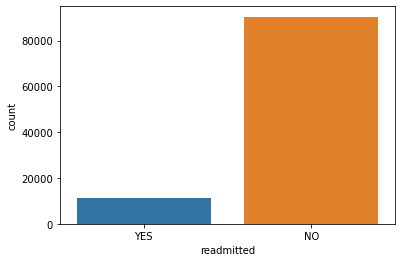

In [18]:
sns.countplot(x='readmitted', data=df)
pass

Видно, что классы ___несбалансированны___. Впоследствии имеет смысл попытаться избавиться от несбалансированности.

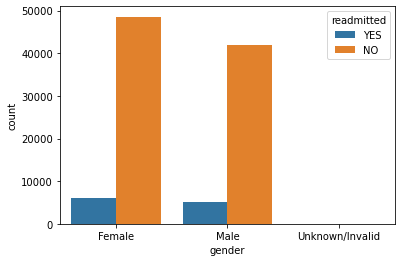

In [19]:
sns.countplot(x='gender', order=df['gender'].value_counts().index, hue='readmitted', data=df)
pass

В датасете женщин больше, к тому же есть невалидные значения, от которых лучше избавиться

In [20]:
rows_with_invalid_gender = df[df['gender'] == 'Unknown/Invalid']  # строки с невалидными значениями признака gender

len(rows_with_invalid_gender)  # число таких строк

3

Таких значений немного, поэтому можно их просто удалить (удалить эти строки из таблицы)

In [21]:
df.drop(rows_with_invalid_gender.index, axis=0, inplace=True)  # удаляем из таблицы

len(df[df['gender'] == 'Unknown/Invalid'])  # число строк с невалидными значениями признака gender после удаления

0

Посмотрим на возраст повторно госпитализируемых

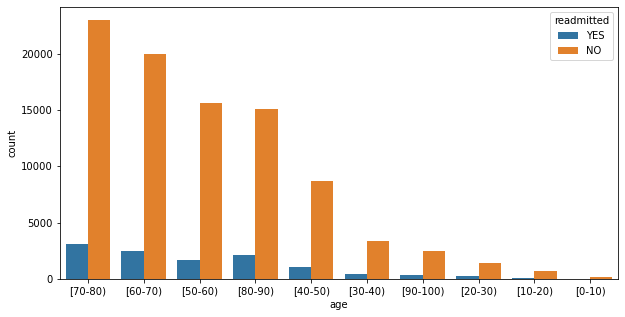

In [22]:
plt.figure(figsize=(10, 5))
sns.countplot(x='age', order=df['age'].value_counts().index, hue='readmitted', data=df)
pass

Видим, что наиболее частыми пациентами являются пожилые люди, причем как среди тех, кто был, так и среди тех, кто не был повторно госпитализирован. Отсюда возникает интересный вопрос, связанный с тем, как именно оплачиваются медицинские услуги. Учитываю возрастное распределение среди пациентов, можно предположить, что большинство пациентов оплачивало медуслуги по страховке ([Medicare](https://en.wikipedia.org/wiki/Medicare_(United_States)))

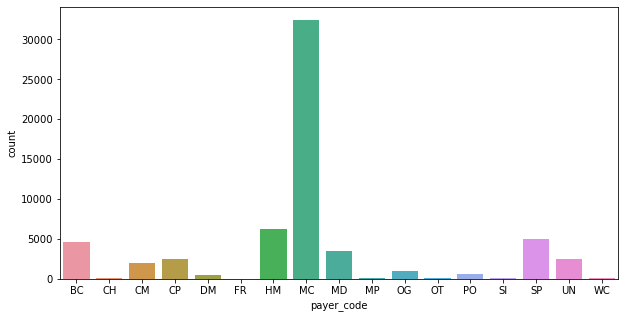

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(x='payer_code', data=df)
pass

Действительно, самый популярный способ оплаты медуслуг - MC (медицинская страховка для лиц от 65 лет и старше)

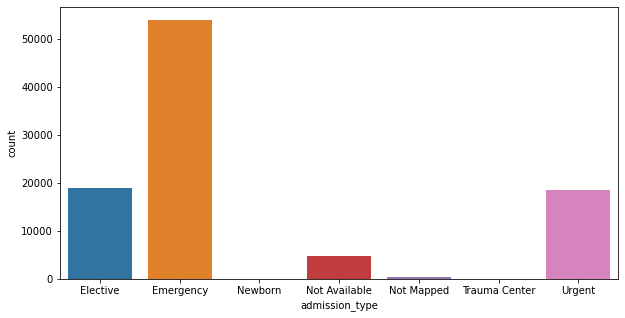

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(x='admission_type', data=df)
pass

Заметим, что наибольшее число обращений было неотложным, что вполне логично, учитывая возраст пациентов

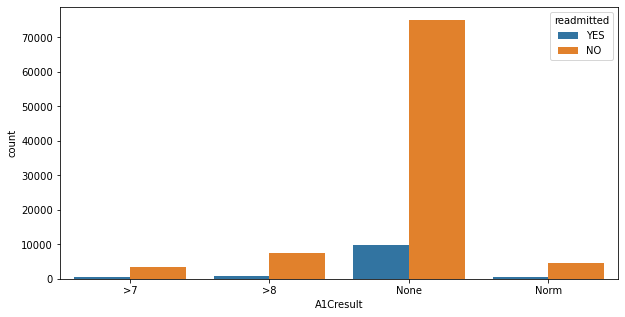

In [25]:
plt.figure(figsize=(10, 5))
sns.countplot(x='A1Cresult', hue='readmitted', data=df)
pass

Подавляющей части пациентов не делали теста на гемоглобин (A1C)

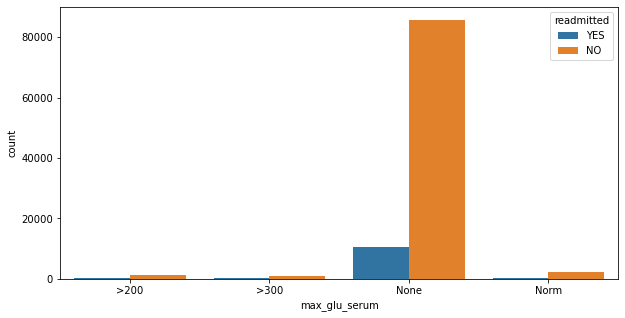

In [26]:
plt.figure(figsize=(10, 5))
sns.countplot(x='max_glu_serum', hue='readmitted', data=df)
pass

Аналогичная ситуация и с тестами на глюкозу

Построим матрицу корреляции для количественных признаков и визуализируем её

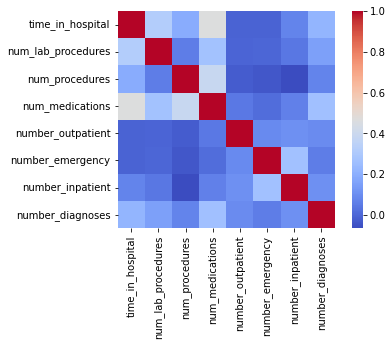

In [27]:
corr_mat = df.corr()

sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Видно, что среди количественных признаков сильно скореллированных не оказалось

Попробуем вычислить матрицу корреляции для всех признаков, но перед этим временно факторизируем категориальные признаки

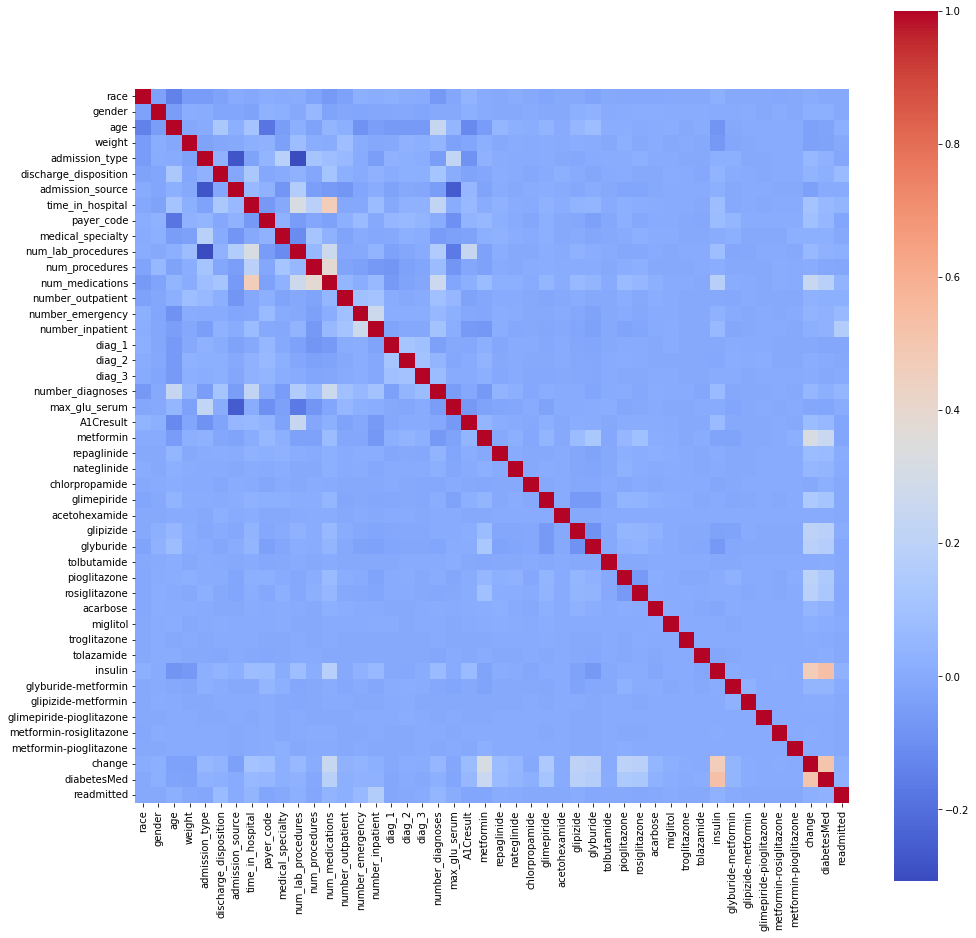

In [28]:
df_f = df.copy()
for column in df_f.select_dtypes(['category']):
    df_f[column] = pd.factorize(df_f[column])[0]

corr_mat_f = df_f.corr()

plt.figure(figsize=(16, 16))
sns.heatmap(corr_mat_f, square=True, cmap='coolwarm')
pass

Видим, что и среди всех признаков сильно скореллированных нет

Выведем пары признаков, для которых коэффициенты корреляции, больше заданного значения

In [29]:
corr_mat_f.where(np.triu(corr_mat_f > 0.4, k=1)).stack().sort_values(ascending=False)

insulin           diabetesMed        0.528249
change            diabetesMed        0.506360
insulin           change             0.468251
time_in_hospital  num_medications    0.466137
dtype: float64

Несмотря на то, что сильной связи между признаками нет, всё же существует средняя связь между _insulin_, _change_, _diabetesMed_, по той причине, что инсулин назначали как лекарство от диабета, а также между _time_in_hospital_ и _num_medications_, т.к. чем больше времени пациент проводит в больнице (по тем или иным причинам, оставаясь при этом именно пациентом), тем больше лекарств нужно, чтобы его исцелить.

## Обработка пропущенных значений

Оценим, сколько пропущенных значений содержится в данном датасете. Для этого посмотрим на процентное содержание пропущенных значений.

In [30]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)

weight                      96.858387
medical_specialty           49.081690
payer_code                  39.557600
admission_source             6.663522
admission_type               5.199336
discharge_disposition        3.627055
race                         2.231656
diag_3                       1.398347
diag_2                       0.351798
diag_1                       0.020636
pioglitazone                 0.000000
tolbutamide                  0.000000
rosiglitazone                0.000000
acarbose                     0.000000
miglitol                     0.000000
troglitazone                 0.000000
tolazamide                   0.000000
glipizide-metformin          0.000000
insulin                      0.000000
glyburide-metformin          0.000000
glipizide                    0.000000
glimepiride-pioglitazone     0.000000
metformin-rosiglitazone      0.000000
metformin-pioglitazone       0.000000
change                       0.000000
diabetesMed                  0.000000
glyburide   

Видим, что есть как признаки, в которых нет пропущенных значений, так и те признаки, в которых пропущено >90% значений. Также заметим, что для числовых признаков нет пропущенных значений.

Ввиду того, что для признаков _race_, _diag_3_, _diag_2_, _diag_1_ мало пропущенных значений (<3%), можно удалить из таблицы все строки, в которых встречаются соответствующие отсутствующие значения.

In [31]:
df.dropna(subset=['race', 'diag_3', 'diag_2', 'diag_1'], inplace=True)
df.shape

(98052, 46)

Имеет смысл удалить признак _payer_code_, для которого пропущено почти 40% записей по той причине, что он, очевидно, никак не влияет на физическое состояние пациента и будет несущественным в задаче предсказания ранней повторной госпитализации

In [32]:
df.drop(['payer_code'], axis=1, inplace=True)
df.shape

(98052, 45)

Признак _weight_ также придется удалить, потому что он отсутствует почти во всех записях (почти 97%) и его невозможно восстановить

In [33]:
df.drop(['weight'], axis=1, inplace=True)
df.shape

(98052, 44)

Для признаков _admission_source_ и _admission_type_ есть специальное значение _'Not Available'_, на которое можно заменить пропущенные значения

In [34]:
df['admission_source'].fillna('Not Available', inplace=True)
df['admission_type'].fillna('Not Available', inplace=True)

А для оставшихся признаков _discharge_disposition_ и _medical_specialty_ имеет смысл специально добавить значение _'Not Available'_, на которое заменим пропущенные значения

In [35]:
df['discharge_disposition'] = df['discharge_disposition'].cat.add_categories('Not Available')
df['discharge_disposition'].fillna('Not Available', inplace=True)

df['medical_specialty'] = df['medical_specialty'].cat.add_categories('Not Available')
df['medical_specialty'].fillna('Not Available', inplace=True)

In [36]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)

race                        0.0
gender                      0.0
glimepiride                 0.0
acetohexamide               0.0
glipizide                   0.0
glyburide                   0.0
tolbutamide                 0.0
pioglitazone                0.0
rosiglitazone               0.0
acarbose                    0.0
miglitol                    0.0
troglitazone                0.0
tolazamide                  0.0
insulin                     0.0
glyburide-metformin         0.0
glipizide-metformin         0.0
glimepiride-pioglitazone    0.0
metformin-rosiglitazone     0.0
metformin-pioglitazone      0.0
change                      0.0
diabetesMed                 0.0
chlorpropamide              0.0
nateglinide                 0.0
repaglinide                 0.0
num_medications             0.0
age                         0.0
admission_type              0.0
discharge_disposition       0.0
admission_source            0.0
time_in_hospital            0.0
medical_specialty           0.0
num_lab_

In [37]:
df.describe(include=['category']).T

,count,unique,top,freq
race,98052,5,Caucasian,75079
gender,98052,2,Female,52833
age,98052,10,[70-80),25305
admission_type,98052,7,Emergency,52178
discharge_disposition,98052,26,Discharged to home,57609
admission_source,98052,16,Emergency Room,55951
medical_specialty,98052,73,Not Available,48318
diag_1,98052,713,428,6730
diag_2,98052,740,428,6517
diag_3,98052,786,250,11208


Заметим, что после обработки пропущенных значений _metformin-rosiglitazone_ стал принимать только одно уникальное значение, а потому этот признак можно убрать из таблицы

In [38]:
df.drop(['metformin-rosiglitazone'], axis=1, inplace=True)

df.shape

(98052, 43)

## Обработка категориальных признаков

### Получение числового признака _age_ из категориального

Сначала обработаем признак _age_. Он принимает значения в виде 10-летнего интервала, а потому имеет смысл заменить интервал на среднее значение интервала, тем самым получив числовой признак

In [39]:
df['age'].unique()

['[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)', '[0-10)']
Categories (10, object): ['[0-10)', '[10-20)', '[20-30)', '[30-40)', ..., '[60-70)', '[70-80)', '[80-90)', '[90-100)']

Все интервалы выглядят следующим образом: $[10 * i; 10 * (i + 1))$ для всех i от 0 до 9. Соответственно, каждый такой интервал можно заменить на $10*i + 5*(i+1)$ для всех i от 0 до 9

In [40]:
age = df['age'].copy()

for i in range(0, 10):
    interval_str = '[' + str(10 * i) + '-' + str(10 * (i + 1)) + ')'
    mean_of_interval = 10 * i + 10 * (i + 1) // 2
    age = age.replace(interval_str, mean_of_interval)  # заменяем интервал на среднее

age = pd.to_numeric(age)  # меняем тип на числовой
df.drop(['age'], axis=1, inplace=True)  # удаляем из исходной таблицы старый категориальный признак age
df = pd.concat([age, df], axis=1)  # добавляем новый числовой признак age

In [41]:
df.dtypes

age                            int64
race                        category
gender                      category
admission_type              category
discharge_disposition       category
admission_source            category
time_in_hospital               int64
medical_specialty           category
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
diag_1                      category
diag_2                      category
diag_3                      category
number_diagnoses               int64
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
chlorpropamide              category
glimepiride                 category
acetohexamide               category
glipizide                   category
g

Будет правильным решением сейчас отдельно сохранить таблицу исключительно с количественными признаками (тех, для которых на данный момент dtype == int64). Впоследствии это облегчит процесс нормализации данных, т.к. нормализируем мы только количественные признаки.

In [42]:
df_num = df.select_dtypes(['int64'])  # num - сокращение от numeric

In [43]:
df_num

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
1,20,3,59,0,18,0,0,0,9
2,35,2,11,5,13,2,0,1,6
3,50,2,44,1,16,0,0,0,7
4,65,1,51,0,8,0,0,0,5
5,80,3,31,6,16,0,0,0,9
...,...,...,...,...,...,...,...,...,...
101761,110,3,51,0,16,0,0,0,9
101762,125,5,33,3,18,0,0,1,9
101763,110,1,53,0,9,1,0,0,13
101764,125,10,45,2,21,0,0,1,9


Сейчас можно временно удалить из исходной таблицы все количественные признаки. После обработки категориальных признаков, можно будет объединить всё обратно в единую таблицу

In [44]:
df.drop(df_num, axis=1, inplace=True)

### Предварительная категоризация заболеваний

In [45]:
len(df['diag_1'].unique())

713

In [46]:
len(df['diag_2'].unique())

740

In [47]:
len(df['diag_3'].unique())

786

Для признаков _diag_1_, _diag_2_, _diag_3_ слишком много уникальных значений (>700). Т.к. эти признаки обозначают диагноз (заболевание), то имеет смысл сгруппировать эти болезни в следующие категории:

* ___Circulatory___ - Заболевания системы кровообращения (коды МКБ9: __390–459__, __785__)
* ___Respiratory___ - Заболевания дыхательной системы (коды МКБ9: __460–519__, __786__)
* ___Digestive___ - Заболевания пищеварительной системы (коды МКБ9: __520–579__, __787__)
* ___Diabetes___ - Сахарный диабет (коды МКБ9: __250.xx__)
* ___Injury___ - Травмы и отравления (коды МКБ9: __800–999__)
* ___Musculoskeletal___ - Заболевания опорно-двигательного аппарата и соединительной ткани (коды МКБ9: __710–739__)
* ___Genitourinary___ - Заболевания мочеполовой системы (коды МКБ9: __580–629__, __788__)
* ___Neoplasms___ - Новообразования (коды МКБ9: __140–239__)
* ___Other___ - Другие заболевания, не принадлежащие ни одной из вышеперечисленных категорий

Также, как и с числовыми признаками, скопируем часть исходной таблицы с признаками _diag_1_, _diag_2_, _diag_3_

In [48]:
diags = ['diag_1', 'diag_2', 'diag_3']

df_diags = df[diags].copy()

In [49]:
diag_categories = [
    'Circulatory', 
    'Respiratory', 
    'Digestive', 
    'Diabetes', 
    'Injury', 
    'Musculoskeletal', 
    'Genitourinary', 
    'Neoplasms', 
    'Other'
]

for diag in diags:
    df_diags[diag] = df_diags[diag].cat.set_categories(diag_categories)

Для удобства можно ввести функцию, принимающую на вход код МКБ9 (ICD9), а на выходе возвращающую название категории заболевания. Но не смотря на то, что мы избавились от пропущенных значений, все же есть валидные коды, начинающиеся с _'E'_ и _'V'_. Эти заболевания должны быть отнесены к категории _'Other'_.

In [50]:
def get_diag_category(icd9_code: str) -> str:
    if icd9_code[0] == 'E' or icd9_code[0] == 'V':
        return 'Other'
    
    icd9_code = int(float(icd9_code))
    
    if 390 <= icd9_code <= 459 or icd9_code == 785:
        return 'Circulatory'
    if 460 <= icd9_code <= 519 or icd9_code == 786:
        return 'Respiratory'
    if 520 <= icd9_code <= 579 or icd9_code == 787:
        return 'Digestive'
    if icd9_code == 250:
        return 'Diabetes'
    if 800 <= icd9_code <= 999:
        return 'Injury'
    if 710 <= icd9_code <= 739:
        return 'Musculoskeletal'
    if 580 <= icd9_code <= 629 or icd9_code == 788:
        return 'Genitourinary'
    if 140 <= icd9_code <= 239:
        return 'Neoplasms'
    
    return 'Other'

Перебирая все строки исходной таблицы, с помощью функции _get_diag_category()_ заполняем новую таблицу с признаками diag_1, diag_2, diag_3

In [51]:
for index, row in df.iterrows():
    for diag in diags:
        df_diags.loc[index, diag] = get_diag_category(df.loc[index, diag])

In [52]:
df_diags.T

,1,2,3,4,5,6,7,8,9,10,...,101756,101757,101758,101759,101760,101761,101762,101763,101764,101765
diag_1,Other,Other,Other,Neoplasms,Circulatory,Circulatory,Circulatory,Circulatory,Circulatory,Diabetes,...,Injury,Respiratory,Other,Circulatory,Other,Diabetes,Digestive,Other,Injury,Digestive
diag_2,Diabetes,Diabetes,Diabetes,Neoplasms,Circulatory,Circulatory,Respiratory,Circulatory,Neoplasms,Circulatory,...,Genitourinary,Respiratory,Other,Other,Circulatory,Other,Other,Genitourinary,Other,Digestive
diag_3,Other,Other,Circulatory,Diabetes,Diabetes,Other,Diabetes,Other,Respiratory,Injury,...,Circulatory,Respiratory,Other,Diabetes,Circulatory,Circulatory,Digestive,Other,Injury,Digestive


Т.к. мы разбили все заболевания на различные категории, а признаки могут принимать значения не всех кодов заболеваний, возникают неиспользуемые категории. От них следует избавиться, чтобы в последующем (при кодировании) уменьшить размерности векторов.

In [53]:
for diag in diags:
    df_diags[diag] = df_diags[diag].cat.remove_unused_categories()

Теперь заменяем "старые" признаки _diag_1_, _diag_2_, _diag_3_ на их "новые" аналоги.

In [54]:
df.drop(diags, axis=1, inplace=True)    # удаляем из исходной таблицы "старые" признаки diag_1, diag_2, diag_3
df = pd.concat([df, df_diags], axis=1)  # добавляем новые признаки diag_1, diag_2, diag_3

In [55]:
df.describe(include=['category']).T

,count,unique,top,freq
race,98052,5,Caucasian,75079
gender,98052,2,Female,52833
admission_type,98052,7,Emergency,52178
discharge_disposition,98052,26,Discharged to home,57609
admission_source,98052,16,Emergency Room,55951
medical_specialty,98052,73,Not Available,48318
max_glu_serum,98052,4,None,92844
A1Cresult,98052,4,None,81859
metformin,98052,4,No,78807
repaglinide,98052,4,No,96529


### Кодирование номинальных  признаков

Сначала все бинарные признаки заменим на числовые (0 и 1)

In [56]:
cat_columns = df.select_dtypes(['category'])

for column in cat_columns:
    if df[column].nunique() == 2:
        df[column] = pd.factorize(df[column])[0]

In [57]:
df.describe(include=['category']).T

,count,unique,top,freq
race,98052,5,Caucasian,75079
admission_type,98052,7,Emergency,52178
discharge_disposition,98052,26,Discharged to home,57609
admission_source,98052,16,Emergency Room,55951
medical_specialty,98052,73,Not Available,48318
max_glu_serum,98052,4,None,92844
A1Cresult,98052,4,None,81859
metformin,98052,4,No,78807
repaglinide,98052,4,No,96529
nateglinide,98052,4,No,97361


Все признаки, кроме _discharge_disposition_, _admission_source_ и _medical_specialty_, содержат число уникальных значений >2 и <10, а, значит, для их кодирования логично применить метод бинаризации (one-hot encoding), предварительно убрав неиспользуемые категории

In [58]:
cat_columns = df.select_dtypes(['category'])

for column in cat_columns:
    if df[column].nunique() < 10:
        df[column] = df[column].cat.remove_unused_categories()  # убираю неиспользуемые категории
        df_dummies = pd.get_dummies(df[column], prefix=column)  # one-hot encoding
        df.drop(column, axis=1, inplace=True)                   # удаляем из исходной таблицы "старые" признаки
        df = pd.concat([df, df_dummies], axis=1)                # добавляем бинаризованные ("новые") признаки

In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,98052.0,0.461174,0.498493,0.0,0.0,0.0,1.0,1.0
acetohexamide,98052.0,0.000010,0.003194,0.0,0.0,0.0,0.0,1.0
tolbutamide,98052.0,0.000224,0.014977,0.0,0.0,0.0,0.0,1.0
troglitazone,98052.0,0.000031,0.005531,0.0,0.0,0.0,0.0,1.0
glipizide-metformin,98052.0,0.000133,0.011514,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
diag_3_Injury,98052.0,0.019275,0.137492,0.0,0.0,0.0,0.0,1.0
diag_3_Musculoskeletal,98052.0,0.018990,0.136490,0.0,0.0,0.0,0.0,1.0
diag_3_Genitourinary,98052.0,0.066567,0.249271,0.0,0.0,0.0,0.0,1.0
diag_3_Neoplasms,98052.0,0.018562,0.134971,0.0,0.0,0.0,0.0,1.0


Признаки _discharge_disposition_, _admission_source_ и _medical_specialty_ содержат большое число уникальных значений, поэтому рассмотренные выше методы для кодирования не годятся. Для кодирования применим метод бинарного кодирования из библиотеки _category_encoders_

Кодируем признак _discharge_disposition_ и заменяем "старый" признак "новым" кодированным.

In [60]:
encoder = ce.BinaryEncoder(return_df=True)
df_discharge_disposition = encoder.fit_transform(df['discharge_disposition'])
df_discharge_disposition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98052 entries, 1 to 101765
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   discharge_disposition_0  98052 non-null  int64
 1   discharge_disposition_1  98052 non-null  int64
 2   discharge_disposition_2  98052 non-null  int64
 3   discharge_disposition_3  98052 non-null  int64
 4   discharge_disposition_4  98052 non-null  int64
dtypes: int64(5)
memory usage: 4.5 MB


In [61]:
df.drop(['discharge_disposition'], axis=1, inplace=True)
df = pd.concat([df, df_discharge_disposition], axis=1)

Кодируем признак _admission_source_ и заменяем "старый" признак "новым" кодированным.

In [62]:
encoder = ce.BinaryEncoder(return_df=True)
df_admission_source = encoder.fit_transform(df['admission_source'])
df_admission_source.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98052 entries, 1 to 101765
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   admission_source_0  98052 non-null  int64
 1   admission_source_1  98052 non-null  int64
 2   admission_source_2  98052 non-null  int64
 3   admission_source_3  98052 non-null  int64
 4   admission_source_4  98052 non-null  int64
dtypes: int64(5)
memory usage: 4.5 MB


In [63]:
df.drop(['admission_source'], axis=1, inplace=True)
df = pd.concat([df, df_admission_source], axis=1)

Кодируем признак _medical_specialty_ и заменяем "старый" признак "новым" кодированным.

In [64]:
encoder = ce.BinaryEncoder(return_df=True)
df_medical_specialty = encoder.fit_transform(df['medical_specialty'])
df_medical_specialty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98052 entries, 1 to 101765
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   medical_specialty_0  98052 non-null  int64
 1   medical_specialty_1  98052 non-null  int64
 2   medical_specialty_2  98052 non-null  int64
 3   medical_specialty_3  98052 non-null  int64
 4   medical_specialty_4  98052 non-null  int64
 5   medical_specialty_5  98052 non-null  int64
 6   medical_specialty_6  98052 non-null  int64
dtypes: int64(7)
memory usage: 6.0 MB


In [65]:
df.drop(['medical_specialty'], axis=1, inplace=True)
df = pd.concat([df, df_medical_specialty], axis=1)

In [66]:
df.describe()

,gender,acetohexamide,tolbutamide,troglitazone,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,...,admission_source_2,admission_source_3,admission_source_4,medical_specialty_0,medical_specialty_1,medical_specialty_2,medical_specialty_3,medical_specialty_4,medical_specialty_5,medical_specialty_6
count,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,...,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000
mean,0.461174,0.000010,0.000224,0.000031,0.000133,0.000010,0.000010,0.538225,0.231530,0.112858,...,0.318984,0.061702,0.678915,0.000938,0.032014,0.044456,0.154041,0.225136,0.277802,0.671450
std,0.498493,0.003194,0.014977,0.005531,0.011514,0.003194,0.003194,0.498539,0.421813,0.316421,...,0.466085,0.240615,0.466896,0.030617,0.176037,0.206107,0.360990,0.417674,0.447917,0.469688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Нормализация количественных признаков

Проведем стандартизацию (линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению) всех признаков

In [67]:
df_num = (df_num - df_num.mean(axis=0)) / df_num.std(axis=0)

In [68]:
df_num.describe()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,9.805200e+04,9.805200e+04,9.805200e+04,9.805200e+04,9.805200e+04,9.805200e+04,9.805200e+04,9.805200e+04,9.805200e+04
mean,-2.865940e-14,1.708714e-14,-1.887332e-14,2.946804e-16,-4.978657e-15,-4.825553e-14,-9.105167e-14,3.062017e-14,1.062674e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.929255e+00,-1.143311e+00,-2.138240e+00,-7.905951e-01,-1.864660e+00,-2.932773e-01,-2.147255e-01,-5.089364e-01,-2.462300e+00
25%,-7.222366e-01,-8.092063e-01,-6.163054e-01,-7.905951e-01,-6.313859e-01,-2.932773e-01,-2.147255e-01,-5.089364e-01,-8.251672e-01
50%,-8.083288e-02,-1.409960e-01,4.319950e-02,-2.052777e-01,-1.380761e-01,-2.932773e-01,-2.147255e-01,-5.089364e-01,2.662548e-01
75%,5.605708e-01,5.272143e-01,7.027044e-01,3.800396e-01,4.785611e-01,-2.932773e-01,-2.147255e-01,2.778300e-01,8.119658e-01
max,1.843378e+00,3.200055e+00,4.507540e+00,2.721309e+00,8.001535e+00,3.243318e+01,8.038794e+01,1.601316e+01,4.631943e+00


Теперь объединим стандартизованные количественные признаки с уже обработанными категориальными признаками

In [69]:
df = pd.concat([df_num, df], axis=1)

In [70]:
df.describe()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender,...,admission_source_2,admission_source_3,admission_source_4,medical_specialty_0,medical_specialty_1,medical_specialty_2,medical_specialty_3,medical_specialty_4,medical_specialty_5,medical_specialty_6
count,9.805200e+04,9.805200e+04,9.805200e+04,9.805200e+04,9.805200e+04,9.805200e+04,9.805200e+04,9.805200e+04,9.805200e+04,98052.000000,...,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000
mean,-2.865940e-14,1.708714e-14,-1.887332e-14,2.946804e-16,-4.978657e-15,-4.825553e-14,-9.105167e-14,3.062017e-14,1.062674e-13,0.461174,...,0.318984,0.061702,0.678915,0.000938,0.032014,0.044456,0.154041,0.225136,0.277802,0.671450
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.498493,...,0.466085,0.240615,0.466896,0.030617,0.176037,0.206107,0.360990,0.417674,0.447917,0.469688
min,-3.929255e+00,-1.143311e+00,-2.138240e+00,-7.905951e-01,-1.864660e+00,-2.932773e-01,-2.147255e-01,-5.089364e-01,-2.462300e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.222366e-01,-8.092063e-01,-6.163054e-01,-7.905951e-01,-6.313859e-01,-2.932773e-01,-2.147255e-01,-5.089364e-01,-8.251672e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-8.083288e-02,-1.409960e-01,4.319950e-02,-2.052777e-01,-1.380761e-01,-2.932773e-01,-2.147255e-01,-5.089364e-01,2.662548e-01,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.605708e-01,5.272143e-01,7.027044e-01,3.800396e-01,4.785611e-01,-2.932773e-01,-2.147255e-01,2.778300e-01,8.119658e-01,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.843378e+00,3.200055e+00,4.507540e+00,2.721309e+00,8.001535e+00,3.243318e+01,8.038794e+01,1.601316e+01,4.631943e+00,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Отбор признаков

В качестве целевого признака выберем признак _readmitted_

In [71]:
X = df.drop(['readmitted'], axis=1)
y = df['readmitted']

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 58)

X_train.shape, X_test.shape

((73539, 137), (24513, 137))

## Обучение классификаторов

In [73]:
from sklearn.metrics import accuracy_score

### Метод kNN

Обучаем _kNN_-классификатор по умолчанию (для ___k = 5___):

In [74]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

Вычисляем ошибку на тренировочной выборке

In [75]:
y_train_pred = knn_model.predict(X_train)
print('Accuracy score on train data: {:.2f}%'.format(100 * accuracy_score(y_train, y_train_pred)))
print('         Error on train data: {:.2f}%'.format(100 * (1 - accuracy_score(y_train, y_train_pred))))

Accuracy score on train data: 89.36%
         Error on train data: 10.64%


Вычисляем ошибку на тестовой выборке

In [76]:
y_test_pred = knn_model.predict(X_test)
print('Accuracy score on test  data: {:.2f}%'.format(100 * accuracy_score(y_test,  y_test_pred)))
print('         Error on test  data: {:.2f}%'.format(100 * np.mean(y_test != y_test_pred)))

Accuracy score on test  data: 88.10%
         Error on test  data: 11.90%


Обучим несколько _kNN_-классификаторов для разных значений _k_ от 5 до 50 с шагом 5, при этом будем собирать значения полученных ошибок, чтобы потом проанализировать результаты.

In [77]:
acc_train = []
err_train = []
acc_test = []
err_test = []

k_values = range(5, 51, 5)

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    print('k = {}:'.format(k))
    
    y_train_pred = knn_model.predict(X_train)
    print('    Accuracy score on train data: {:.2f}%'.format(100 * accuracy_score(y_train, y_train_pred)))
    print('             Error on train data: {:.2f}%'.format(100 * np.mean(y_train != y_train_pred)))
    acc_train.append(accuracy_score(y_train, y_train_pred))
    err_train.append(np.mean(y_train != y_train_pred))
    
    y_test_pred = knn_model.predict(X_test)
    print('    Accuracy score on test  data: {:.2f}%'.format(100 * accuracy_score(y_test,  y_test_pred)))
    print('             Error on test  data: {:.2f}%'.format(100 * np.mean(y_test != y_test_pred)))
    acc_test.append(accuracy_score(y_test, y_test_pred))
    err_test.append(np.mean(y_test != y_test_pred))

k = 5:
    Accuracy score on train data: 89.36%
             Error on train data: 10.64%
    Accuracy score on test  data: 88.10%
             Error on test  data: 11.90%
k = 10:
    Accuracy score on train data: 88.82%
             Error on train data: 11.18%
    Accuracy score on test  data: 88.89%
             Error on test  data: 11.11%
k = 15:
    Accuracy score on train data: 88.77%
             Error on train data: 11.23%
    Accuracy score on test  data: 88.90%
             Error on test  data: 11.10%
k = 20:
    Accuracy score on train data: 88.69%
             Error on train data: 11.31%
    Accuracy score on test  data: 89.00%
             Error on test  data: 11.00%
k = 25:
    Accuracy score on train data: 88.69%
             Error on train data: 11.31%
    Accuracy score on test  data: 88.97%
             Error on test  data: 11.03%
k = 30:
    Accuracy score on train data: 88.68%
             Error on train data: 11.32%
    Accuracy score on test  data: 88.97%
          

Посмотрим на графики за значениями точности и ошибки на тренировочном и тестовом наборах при различных значениях k

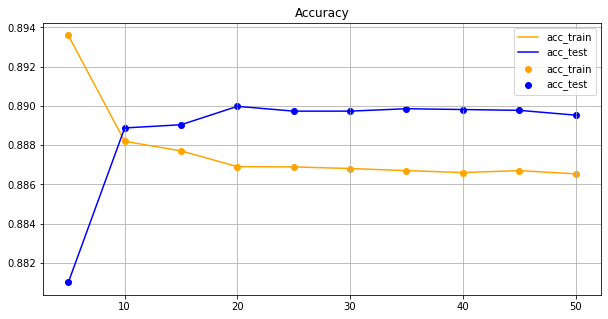

In [78]:
fig = plt.figure(figsize=(10, 5))

plt.title('Accuracy')
plt.scatter(list(k_values)[::-1], acc_train[::-1], color='orange', label='acc_train')
plt.plot(list(k_values)[::-1], acc_train[::-1], color='orange', label='acc_train')

plt.scatter(list(k_values)[::-1], acc_test[::-1], color='blue', label='acc_test')
plt.plot(list(k_values)[::-1], acc_test[::-1], color='blue', label='acc_test')

plt.grid()
plt.legend()

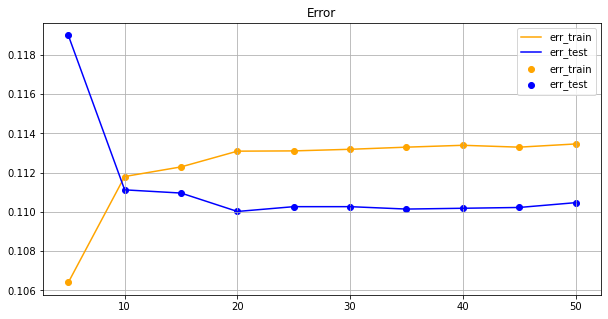

In [79]:
fig = plt.figure(figsize=(10, 5))

plt.title('Error')
plt.scatter(list(k_values)[::-1], err_train[::-1], color='orange', label='err_train')
plt.plot(list(k_values)[::-1], err_train[::-1], color='orange', label='err_train')

plt.scatter(list(k_values)[::-1], err_test[::-1], color='blue', label='err_test')
plt.plot(list(k_values)[::-1], err_test[::-1], color='blue', label='err_test')

plt.grid()
plt.legend()

Наилучшая точность получена при ___k = 20___, однако разница не столь велика. Точность держится на уровне 89%. Имеет смысл сравнить с другими типами классификаторов.

### Алгоритм Random Forest

Обучим классификатор на основе алгоритма _Random Forest_

In [80]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=500)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

Вычисляем ошибку на тренировочной выборке

In [81]:
y_train_pred = rf_model.predict(X_train)
print('Accuracy score on train data: {:.2f}%'.format(100 * accuracy_score(y_train, y_train_pred)))
print('         Error on train data: {:.2f}%'.format(100 * np.mean(y_train != y_train_pred)))

Accuracy score on train data: 100.00%
         Error on train data: 0.00%


Вычисляем ошибку на тестовой выборке

In [82]:
y_test_pred = rf_model.predict(X_test)
print('Accuracy score on test  data: {:.2f}%'.format(100 * accuracy_score(y_test,  y_test_pred)))
print('         Error on test  data: {:.2f}%'.format(100 * np.mean(y_test != y_test_pred)))

Accuracy score on test  data: 88.99%
         Error on test  data: 11.01%


Использование алгоритма _Random Forest_ не улучшило результаты.

In [83]:
pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

num_lab_procedures          8.183475e-02
num_medications             7.314423e-02
time_in_hospital            5.415417e-02
number_inpatient            4.796692e-02
age                         4.647632e-02
                                ...     
chlorpropamide_Down         7.094967e-07
tolazamide_Up               6.515650e-07
admission_source_0          5.694140e-07
glimepiride-pioglitazone    4.931545e-07
metformin-pioglitazone      9.795498e-08
Length: 137, dtype: float64

### Алгоритм Logistic Regression

Обучим классификатор на основе алгоритма _Logistic Regression_

In [84]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='newton-cg')
lr_model.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

Вычисляем ошибку на тренировочной выборке

In [85]:
y_train_pred = lr_model.predict(X_train)
print('Accuracy score on train data: {:.2f}%'.format(100 * accuracy_score(y_train, y_train_pred)))
print('         Error on train data: {:.2f}%'.format(100 * np.mean(y_train != y_train_pred)))

Accuracy score on train data: 88.62%
         Error on train data: 11.38%


Вычисляем ошибку на тестовой выборке

In [86]:
y_test_pred = lr_model.predict(X_test)
print('Accuracy score on test  data: {:.2f}%'.format(100 * accuracy_score(y_test,  y_test_pred)))
print('         Error on test  data: {:.2f}%'.format(100 * np.mean(y_test != y_test_pred)))

Accuracy score on test  data: 88.90%
         Error on test  data: 11.10%


Использование алгоритма _Logistic Regression_ также не улучшило результаты.

### Алгоритм SGDClassifier

Обучим классификатор на основе алгоритма _SGD_

In [87]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier(loss='log', random_state=58)
sgd_model.fit(X_train, y_train)

SGDClassifier(loss='log', random_state=58)

Вычисляем ошибку на тренировочной выборке

In [88]:
y_train_pred = sgd_model.predict(X_train)
print('Accuracy score on train data: {:.2f}%'.format(100 * accuracy_score(y_train, y_train_pred)))
print('         Error on train data: {:.2f}%'.format(100 * np.mean(y_train != y_train_pred)))

Accuracy score on train data: 88.43%
         Error on train data: 11.57%


Вычисляем ошибку на тестовой выборке

In [89]:
y_test_pred = sgd_model.predict(X_test)
print('Accuracy score on test  data: {:.2f}%'.format(100 * accuracy_score(y_test,  y_test_pred)))
print('         Error on test  data: {:.2f}%'.format(100 * np.mean(y_test != y_test_pred)))

Accuracy score on test  data: 88.49%
         Error on test  data: 11.51%


Использование алгоритма _SGD_ также не улучшило результаты.

## Выводы

* Лучшая точность, которой удалось добиться на тестовой выборке - 89% достигнута методом _kNN_ при _k = 20_.
* Ни один из других предложенных алгоритмов не смог добиться лучшей точности. Но при этом все алгоритмы показывают приблизительно похожую точность предсказывания на тестовой выборке.
* Метод _kNN_ по времени работает сильно дольше остальных методов.